### Import Packages

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy as sp

### Create Dataset

In [49]:
boston = datasets.load_boston()
iris = datasets.load_iris()
wine = datasets.load_wine()
X = wine['data']
y = wine['target']

### Scale Data

In [50]:
scaler = StandardScaler().fit(X)
Z = scaler.transform(X)

### Perform PCA

In [51]:
cov_Z = np.dot(np.transpose(Z), Z)

values, vectors = np.linalg.eig(cov_Z)
idx = np.argsort(values)[::-1]
values_star = values[idx]
D = np.diag(values_star)
P_star = vectors[:, idx]

Z_star = np.dot(Z, P_star)

### Determine which Features to Keep - Scree Plot

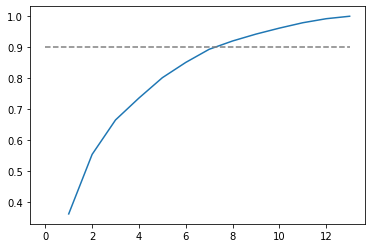

In [52]:
pct_var = [np.sum(values_star[:i + 1]) / np.sum(values_star) for i in range(len(values_star))]

plt.plot([i + 1 for i in range(len(values_star))], pct_var)
plt.plot([0, len(values_star)], [.9, .9], linestyle = 'dashed', color = 'gray')

### Elbow Plot

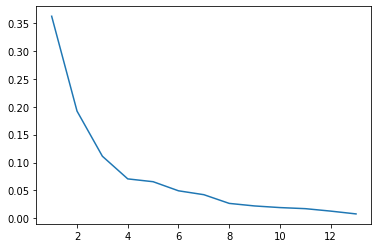

In [53]:
pct_var_ind = [values_star[i] / np.sum(values_star) for i in range(len(values_star))]
plt.plot([i + 1 for i in range(len(values_star))], pct_var_ind)

### Interpret Remaining Components - Boston Dataset

In [39]:
# Assume we are keeping 4 components
# Boston Dataset Column Descriptions
    # CRIM per capita crime rate by town
    # ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    # INDUS proportion of non-retail business acres per town
    # CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    # NOX nitric oxides concentration (parts per 10 million)
    # RM average number of rooms per dwelling
    # AGE proportion of owner-occupied units built prior to 1940
    # DIS weighted distances to five Boston employment centres
    # RAD index of accessibility to radial highways
    # TAX full-value property-tax rate per $10,000
    # PTRATIO pupil-teacher ratio by town
    # B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    # LSTAT % lower status of the population
    # MEDV Median value of owner-occupied homes in $1000’s
np.where(np.abs(P_star[:, 0:4]) < .3, 0, P_star[:, 0:4])

# First Component is a measure of many things excluding crime, proportion of blacks, status,
    # rooms per dwelling, and charles river - Essentially is this neighboorhood commercial or not?
# Seconds component is about crime, distance to employment centers, proportion of blacks, and charles river
# Third component is about rooms per dwelling, proportion of blacks, and lower status
# Fourth component is about Charles river

array([[ 0.        ,  0.31525237,  0.        ,  0.        ],
       [ 0.        ,  0.3233129 ,  0.        ,  0.        ],
       [-0.34667207,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.45482914,  0.        , -0.81594136],
       [-0.34285231,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.59396117,  0.        ],
       [-0.3136706 , -0.31197778,  0.        ,  0.        ],
       [ 0.32154387,  0.34907   ,  0.        ,  0.        ],
       [-0.31979277,  0.        ,  0.        ,  0.        ],
       [-0.33846915,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.30589695,  0.32344627,  0.        ],
       [ 0.        ,  0.        ,  0.3001459 ,  0.        ],
       [-0.30975984,  0.        ,  0.        ,  0.        ]])

### Interpret Remaining Components - Iris

In [48]:
np.where(np.abs(P_star[:, 0:3]) < .5, 0, P_star[:, 0:3])

array([[ 0.52106591,  0.        , -0.71956635],
       [ 0.        , -0.92329566,  0.        ],
       [ 0.5804131 ,  0.        ,  0.        ],
       [ 0.56485654,  0.        ,  0.63427274]])

### Interpret Remaining Components - Wine

In [56]:
np.where(np.abs(P_star[:, 0:4]) < .35, 0, P_star[:, 0:4])

array([[ 0.        , -0.48365155,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.53689028],
       [ 0.        ,  0.        , -0.6262239 ,  0.        ],
       [ 0.        ,  0.        , -0.61208035,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.35179658],
       [-0.39466085,  0.        ,  0.        ,  0.        ],
       [-0.4229343 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.39905653],
       [ 0.        , -0.52999567,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.42777141],
       [-0.37616741,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.36490283,  0.        ,  0.        ]])